# Übung 2: Hauptkomponentenanalyse

## 1. Implementierung der Hauptkomponentenanalyse

In [24]:
import pandas as pd
import numpy as np
import numpy.testing as npt
import json
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True, linewidth=np.inf)

%reload_ext version_information
%version_information numpy, pandas, json, zipfile, plt, seaborn

Software versions
Python 3.7.4 64bit [GCC 7.3.0]
IPython 7.8.0
OS Linux 4.15.0 65 generic x86_64 with debian buster sid
numpy 1.17.2
pandas 0.25.1
json 2.0.9
zipfile The 'zipfile' distribution was not found and is required by the application
plt The 'plt' distribution was not found and is required by the application
seaborn 0.9.0
Mon Oct 21 16:19:11 2019 CEST

In [25]:
'''
Attribute Information:
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's
'''

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols[0:13], index_col=False)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [26]:
#data = np.array([])
def pca(data, r, whiten=True):
    n, d = data.shape
    
    if whiten:
        # Center
        data = data - data.mean(axis=0)
        npt.assert_almost_equal(data[:, 0].mean(), 0.0, decimal=10)

        # Normalize
        data = data / data.std(axis=0)
        npt.assert_almost_equal(data[:, 0].var(), 1.0, decimal=10)
    
    U, S, VT = np.linalg.svd(data)
    print(U.shape, S.shape, VT.shape)
    
    data_whitened = data
    eigen_values = S[:r]**2 / (n - 1)
    principal_components = VT.T[:, :r]
    scores = (U[:, :r] @ np.diag(S[:r]))
    
    return data_whitened, eigen_values, principal_components, scores

def plot_visuals(data_whitened, scores):
    sns.set_style("dark")
    color1 = "blue"
    color2 = "red"
    fig, axes = plt.subplots(3,3, figsize=(15,10))
    sns.scatterplot(data_whitened[:, 0], data_whitened[:, 1], color=color1, palette ='deep', ax=axes[0, 0])
    sns.scatterplot(scores[:, 0], scores[:, 1], color=color2, palette ='deep', ax=axes[0, 0])
    axes[0, 0].set_title("XY-Ebene")
    axes[0, 0].set_xlabel("X")
    axes[0, 0].set_ylabel("Y")

    sns.scatterplot(data_whitened[:, 0], data_whitened[:, 2], color=color1, palette ='deep', ax=axes[0, 1])
    sns.scatterplot(scores[:, 0], scores[:, 2], color=color2, palette ='deep', ax=axes[0, 1])
    axes[0, 1].set_title("XZ-Ebene")
    axes[0, 1].set_xlabel("X")
    axes[0, 1].set_ylabel("Z")

    sns.scatterplot(data_whitened[:, 1], data_whitened[:, 2], color=color1, palette ='deep', ax=axes[0, 2])
    sns.scatterplot(scores[:, 1], scores[:, 2], color=color2, palette ='deep', ax=axes[0, 2])
    axes[0, 2].set_title("YZ-Ebene")
    axes[0, 2].set_xlabel("Y")
    axes[0, 2].set_ylabel("Z")

    sns.distplot(np.array(data_whitened[:, 0]), color=color1, ax=axes[1, 0], norm_hist=True, kde=False)
    sns.distplot(np.array(scores[:, 0]), color=color2, ax=axes[1, 0], norm_hist=True, kde=False)
    axes[1, 0].set_title("X-Verteilung")

    sns.distplot(np.array(data_whitened[:, 1]), color=color1, ax=axes[1, 1], norm_hist=True, kde=False)
    sns.distplot(np.array(scores[:, 1]), color=color2, ax=axes[1, 1], norm_hist=True, kde=False)
    axes[1, 1].set_title("Y-Verteilung")

    sns.distplot(np.array(data_whitened[:, 2]), color=color1, ax=axes[1, 2], norm_hist=True, kde=False)
    sns.distplot(np.array(scores[:, 2]), color=color2, ax=axes[1, 2], norm_hist=True, kde=False)
    axes[1, 2].set_title("Z-Verteilung")

    sns.kdeplot(np.array(data_whitened[:, 0]), color=color1, ax=axes[2, 0], shade=True)
    sns.kdeplot(np.array(scores[:, 0]), color=color2, ax=axes[2, 0], shade=True)
    axes[2, 0].set_title("X-Verteilung")

    sns.kdeplot(np.array(data_whitened[:, 1]), color=color1, ax=axes[2, 1], shade=True)
    sns.kdeplot(np.array(scores[:, 1]), color=color2, ax=axes[2, 1], shade=True)
    axes[2, 1].set_title("Y-Verteilung")

    sns.kdeplot(np.array(data_whitened[:, 2]), color=color1, ax=axes[2, 2], shade=True)
    sns.kdeplot(np.array(scores[:, 2]), color=color2, ax=axes[2, 2], shade=True)
    axes[2, 2].set_title("Z-Verteilung")

### Testen der PCA

(8, 8) (3,) (3, 3)
[1. 1. 1.]
[1.45655795 1.         0.54344205]
[1.66463766 1.14285714 0.62107663]


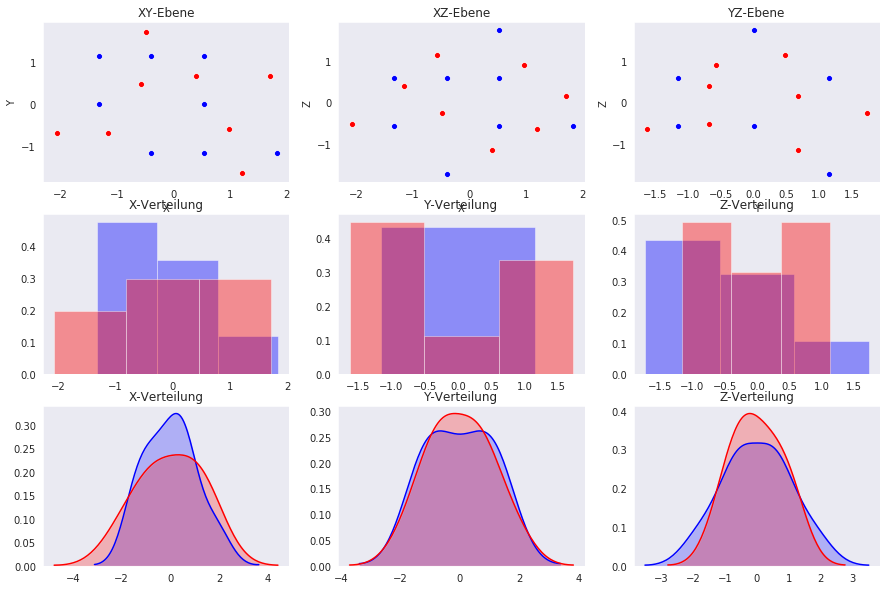

In [27]:
data = [[  17.0,  0.0,  0.0],
          [  5.0,  0.0,  1.0],
          [ 10.0,  0.0,  0.0],
          [ 10.0,  5.0,  2.0],
          [ 10.0, 10.0,  1.0],
          [  5.0, 10.0, -1.0],
          [  0.0, 10.0,  1.0],
          [  0.0,  5.0,  0.0]]
data = np.asarray(data)
data_whitened, eigen_values, principal_components, scores = pca(data, 3, whiten=True)

print(data_whitened.var(axis=0))
print(scores.var(axis=0))
print(eigen_values)
plot_visuals(data_whitened, scores)

(100, 100) (3,) (3, 3)
[1. 1. 1.]
[1.20301976 0.99146163 0.80551861]
[1.21517148 1.00147639 0.81365516]


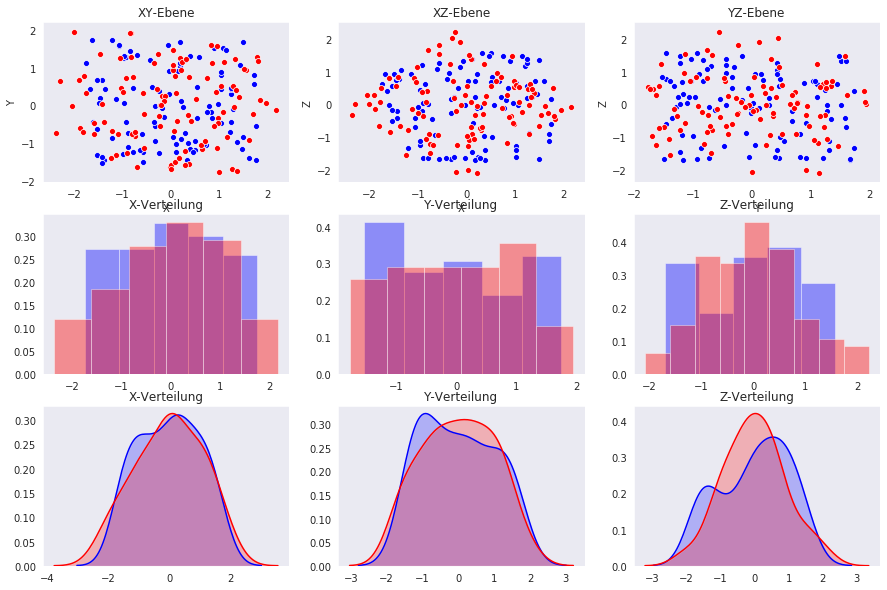

In [28]:
x = np.random.randint(100, size=100)
y = np.random.randint(100, size=100)
z = np.random.randint(100, size=100)
data = np.asarray([x, y, z]).T
data_whitened, eigen_values, principal_components, scores = pca(data, 3, whiten=True)

print(data_whitened.var(axis=0))
print(scores.var(axis=0))
print(eigen_values)
plot_visuals(data_whitened, scores)

## 2. Eigengesichter

In [29]:
import pandas as pd
import numpy as np
import tarfile, requests, wget
import os
import skimage as ski
from sklearn.decomposition import PCA

np.set_printoptions(suppress=True, linewidth=np.inf)

!pip install version_information
%reload_ext version_information
%version_information numpy, pandas, tarfile, requests, wget, os, skimage

Software,Version
Python,3.7.4 64bit [GCC 7.3.0]
IPython,7.8.0
OS,Linux 4.15.0 65 generic x86_64 with debian buster sid
numpy,1.17.2
pandas,0.25.1
tarfile,The 'tarfile' distribution was not found and is required by the application
requests,2.22.0
wget,3.2
os,The 'os' distribution was not found and is required by the application
skimage,0.15.0


In [34]:
filename = "lfw-funneled"
dirname = "lfw_funneled"
url = "http://vis-www.cs.umass.edu/lfw/"+filename+".tgz"
tar_file_name = "../data/"+filename+".tgz"
untar_file_name = "../data/"
wget.download(url, tar_file_name) if not os.path.isfile(tar_file_name) else print("File already downloaded.")
tarfile.open(tar_file_name, "r:gz").extractall(untar_file_name) if not os.path.isdir(untar_file_name+dirname) else print("File already extracted.")

File already downloaded.
File already extracted.


In [31]:
def process_img(img):
    # crop, scale, flatten
    y_l, y_u = 90, 185
    x_l, x_u = 80, 170
    img_cropped = img[y_l:y_u, x_l:x_u]
    img_scaled = ski.transform.resize(img_cropped, (32, 32), anti_aliasing=True)
    img_flatten = img_scaled.flatten()
    return img_flatten

In [32]:
train = []
validate = []
for path, dirs, files in os.walk(untar_file_name):
    if len(files) >= 70:
        name = path.split("/")[-1]
        for i in range(len(files) - 1):
            img = ski.io.imread(os.path.join(path, files[i]), as_gray=True)
            img_processed = process_img(img)
            train.append(img_processed)
        img = ski.io.imread(os.path.join(path, files[-1]), as_gray=True)
        validate.append([process_img(img), name])

train = np.asarray(train)
validate = np.asarray(validate)
train.shape, validate.shape

((1281, 1024), (7, 2))

(1281, 1281) (1024,) (1024, 1024)
[1. 1. 1. ... 1. 1. 1.]
[291.06580588 164.12864169  51.11353864 ...   0.00005613   0.00005212   0.00004675]
[291.29320104 164.25686719  51.1534711  ...   0.00005617   0.00005216   0.00004679]


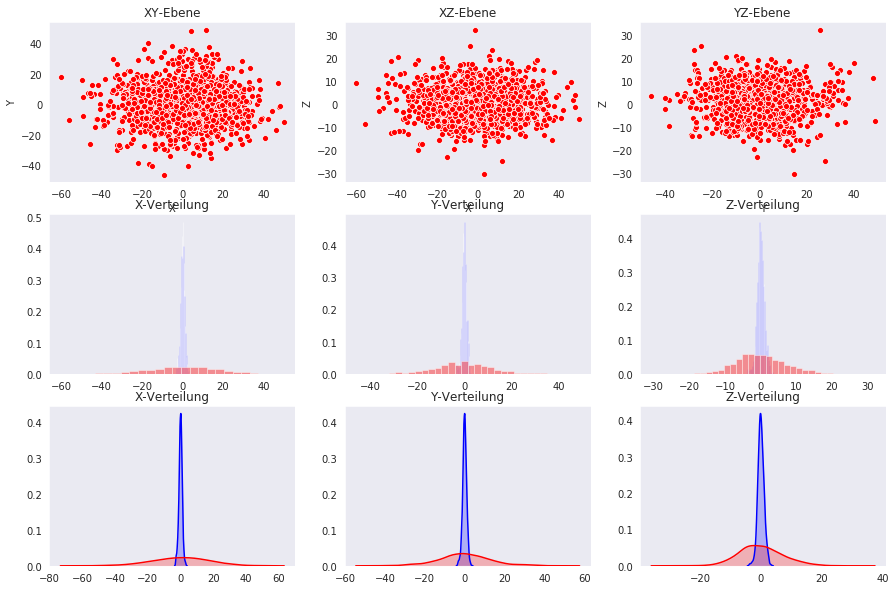

In [33]:
data_whitened, eigen_values, principal_components, scores = pca(train, 1024)
print(data_whitened.var(axis=0))
print(scores.var(axis=0))
print(eigen_values)
plot_visuals(data_whitened, scores)